# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>



**¡Empecemos!** &#x1F680;


https://colab.research.google.com/drive/1mc-euIrb3l44PLOdP52YMRvo1hDDcnfh?usp=sharing  Enlace al EDA

Preguntas aclaratorias:

Como hay muchos más clientes que se quedan que los que se van, ¿prefieren que trabajemos con los datos así como están o podemos trabajar con muestras sintéticas por llamarlas de alguna manera?

¿Es más crítico identificar a casi todos los clientes que podrían irse o prefieren priorizar la presición a la hora de marcar a alguien como posible cancelador de servicio?

Consideras que el manejo que se le dió a los valores nulos en el EDA es válido?

Plan de trabajo

Prepararemos los datos para el modelo convirtiendo las variables en formatos que los modelos puedan entender de mejor forma

Probar y comparar modelos empezando con un modelo simple (regresión logística) para establecer una línea base, y luego probaremos opciones más complejas (como Random Forest o XGBoost). Evaluaremos con métricas alineadas al objetivo (recall, ROC AUC, etc.).

Identificaremos las variables que más impulsan el churn con el fin de que lo analizado se traduzca en posibles acciones para mejorar y tener mayor retención de clientes


## Comentario general del revisor 1a iteracion

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Se nota el empeño y la dedicación que has puesto en tu proyecto, eso es muy valioso. Para poder revisarlo adecuadamente, recuerda que es necesario subirlo en un notebook directamente en la plataforma y no en una liga externa, ya que desde ahí no se puede dar retroalimentación. Con este pequeño ajuste, tu esfuerzo podrá reflejarse aún mejor y recibirás comentarios más útiles para seguir creciendo.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola Hesus! He puesto el código aquí en el notebook, ahora si podemos continuar con el siguiente paso verdad? he dejado las preguntas y el plan de trabajo allí arriba
    
</div>


In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
)

In [ ]:
drive.mount('/content/drive')
DATA_DIR = "/content/drive/My Drive/Datasets/final_provider"

contract = pd.read_csv(f"{DATA_DIR}/contract.csv")
personal = pd.read_csv(f"{DATA_DIR}/personal.csv")
internet = pd.read_csv(f"{DATA_DIR}/internet.csv")
phone = pd.read_csv(f"{DATA_DIR}/phone.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Contract:", contract.shape)
print("Personal:", personal.shape)
print("Internet:", internet.shape)
print("Phone:", phone.shape)

Contract: (7043, 8)
Personal: (7043, 5)
Internet: (5517, 8)
Phone: (6361, 2)


In [ ]:
def resumen_df(df, nombre):
    print(f"\n=== {nombre.upper()} ===")
    print("Forma:", df.shape)
    print("\nColumnas y tipos:\n", df.dtypes)
    print("\nValores nulos por columna:\n", df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(3))

resumen_df(contract, "contract")
resumen_df(personal, "personal")
resumen_df(internet, "internet")
resumen_df(phone, "phone")


=== CONTRACT ===
Forma: (7043, 8)

Columnas y tipos:
 customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

Valores nulos por columna:
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Primeras filas:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15



=== PERSONAL ===
Forma: (7043, 5)

Columnas y tipos:
 customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

Valores nulos por columna:
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Primeras filas:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No



=== INTERNET ===
Forma: (5517, 8)

Columnas y tipos:
 customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

Valores nulos por columna:
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Primeras filas:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No



=== PHONE ===
Forma: (6361, 2)

Columnas y tipos:
 customerID       object
MultipleLines    object
dtype: object

Valores nulos por columna:
 customerID       0
MultipleLines    0
dtype: int64

Primeras filas:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


Podemos observar que no hay valores nulos, taMbién que hay archivos con menos filas pero esto no se debe a un error de los datos sino a que no todos los clientes tienen internet o teléfono.

De igual manera realizaremos algunos ajustes a los datos solo para evitar problemas al momento de crear gráficas estandarizando los datos a cierto formato según el tipo de columna para así posteriormente realizar el merge

In [ ]:
def strip_object_cols(df):
    df = df.copy()
    for c in df.columns:
        if df[c].dtype == "object":
            df[c] = df[c].astype(str).str.strip()
    return df

contract = strip_object_cols(contract)
personal = strip_object_cols(personal)
internet = strip_object_cols(internet)
phone    = strip_object_cols(phone)

contract["TotalCharges"] = contract["TotalCharges"].replace({"": np.nan, " ": np.nan})
contract["TotalCharges"] = pd.to_numeric(contract["TotalCharges"], errors="coerce")

print("Nulos en TotalCharges tras conversión:", contract["TotalCharges"].isna().sum())

for dcol in ["BeginDate", "EndDate"]:
    if dcol in contract.columns:
        contract[dcol] = pd.to_datetime(contract[dcol], errors="coerce")

yn_cols_contract = ["PaperlessBilling"]
for c in yn_cols_contract:
    if c in contract.columns:
        contract[c] = contract[c].str.lower().map({"yes": "Yes", "no": "No"}).fillna(contract[c])

if "SeniorCitizen" in personal.columns:
    personal["SeniorCitizen"] = pd.to_numeric(personal["SeniorCitizen"], errors="coerce").fillna(0).astype(int)

for c in ["Partner", "Dependents"]:
    if c in personal.columns:
        personal[c] = personal[c].str.lower().map({"yes": "Yes", "no": "No"}).fillna(personal[c])

if "InternetService" in internet.columns:
    internet["InternetService"] = internet["InternetService"].str.title()  # DSL, Fiber Optic, No

for c in ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]:
    if c in internet.columns:
        internet[c] = internet[c].str.lower().map({"yes": "Yes", "no": "No"}).fillna(internet[c])

if "MultipleLines" in phone.columns:
    phone["MultipleLines"] = phone["MultipleLines"].str.lower().map({"yes": "Yes", "no": "No"}).fillna(phone["MultipleLines"])

print("CONTRACT dtypes:\n", contract.dtypes, "\n")
print("PERSONAL dtypes:\n", personal.dtypes, "\n")
print("INTERNET dtypes:\n", internet.dtypes, "\n")
print("PHONE dtypes:\n", phone.dtypes, "\n")

for name, df_ in [("contract", contract), ("personal", personal), ("internet", internet), ("phone", phone)]:
    assert "customerID" in df_.columns, f"Falta customerID en {name}"
    df_["customerID"] = df_["customerID"].astype(str).str.strip()

Nulos en TotalCharges tras conversión: 11


/tmp/ipython-input-1740773854.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract[dcol] = pd.to_datetime(contract[dcol], errors="coerce")


CONTRACT dtypes:
 customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
dtype: object 

PERSONAL dtypes:
 customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object 

INTERNET dtypes:
 customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object 

PHONE dtypes:
 customerID       object
MultipleLines    object
dtype: object 



Observamos que luego de estandarizar los datos según el tipo de columna TotalCharges tiene ahora valores nulos, intentaremos completar estos espacios vacios con la suma de lo que pagan mensualmente más el tenure del cliente y a suvez estableceremos que si el cliente tiene una fecha final cuente como churn y así sabremos que canceló

In [ ]:
REF_DATE = pd.Timestamp("2020-02-01")

end_eff = contract["EndDate"].fillna(REF_DATE)
contract["tenure_months"] = ((end_eff - contract["BeginDate"]).dt.days / 30.44).clip(lower=0).round(1)

#Imputar TotalCharges faltantes como MonthlyCharges * tenure_months
mask_na_tc = contract["TotalCharges"].isna()
contract.loc[mask_na_tc, "TotalCharges"] = (
    contract.loc[mask_na_tc, "MonthlyCharges"] * contract.loc[mask_na_tc, "tenure_months"]
).round(2)

print("Nulos restantes en TotalCharges:", contract["TotalCharges"].isna().sum())

# Churn = 1 si EndDate existe (cliente canceló), 0 si sigue activo (EndDate NaT)
contract["Churn"] = contract["EndDate"].notna().astype(int)

print(contract["Churn"].value_counts(normalize=True).round(3))

Nulos restantes en TotalCharges: 0
Churn
0    0.735
1    0.265
Name: proportion, dtype: float64


In [ ]:
df = contract.merge(personal, on="customerID", how="left") \
             .merge(internet, on="customerID", how="left") \
             .merge(phone,    on="customerID", how="left")

print("Shape final:", df.shape)

df["Churn"] = df["EndDate"].apply(lambda x: 0 if x == "No" else 1)

print(df["Churn"].value_counts(normalize=True))

df.head()

Shape final: (7043, 22)
Churn
1    1.0
Name: proportion, dtype: float64


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_months,Churn,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,1.0,1,...,Yes,No,Dsl,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,34.0,1,...,No,No,Dsl,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,2.0,1,...,No,No,Dsl,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,45.0,1,...,No,No,Dsl,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,2.0,1,...,No,No,Fiber Optic,No,No,No,No,No,No,No


Aquí podemos observar el dataset unificado pero podemos encontrar dos problemas; el primero, está tomando todos los clientes como churn y la columna multiple lines contiene valores nulos/ausentes. Lo que vamos a hacer es corregir el error del churn y los valores ausentes deben ser porque esos clientes no tienen línea telefónica, de todas maneras par aislar este problema con otros posibles servicios reemplazaremos los NaN en caso de que hayan con no service

In [ ]:
df["Churn"] = df["EndDate"].notna().astype(int)

df["MultipleLines"] = df["MultipleLines"].fillna("No phone service")

service_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection",
                "TechSupport","StreamingTV","StreamingMovies"]

for c in service_cols:
    df[c] = df[c].fillna("No internet service")

yes_no_cols = ["PaperlessBilling","Partner","Dependents","MultipleLines"] + service_cols
for c in yes_no_cols:
    if c in df.columns:
        df[c] = df[c].str.strip().str.capitalize()

print("Churn distribution:\n", df["Churn"].value_counts(normalize=True).round(3))
print("\nValores únicos en MultipleLines:", df["MultipleLines"].unique())
for c in service_cols:
    print(f"{c}: {df[c].unique()[:5]} ...")

Churn distribution:
 Churn
0    0.735
1    0.265
Name: proportion, dtype: float64

Valores únicos en MultipleLines: ['No phone service' 'No' 'Yes']
OnlineSecurity: ['No' 'Yes' 'No internet service'] ...
OnlineBackup: ['Yes' 'No' 'No internet service'] ...
DeviceProtection: ['No' 'Yes' 'No internet service'] ...
TechSupport: ['No' 'Yes' 'No internet service'] ...
StreamingTV: ['No' 'Yes' 'No internet service'] ...
StreamingMovies: ['No' 'Yes' 'No internet service'] ...


/tmp/ipython-input-1843472432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


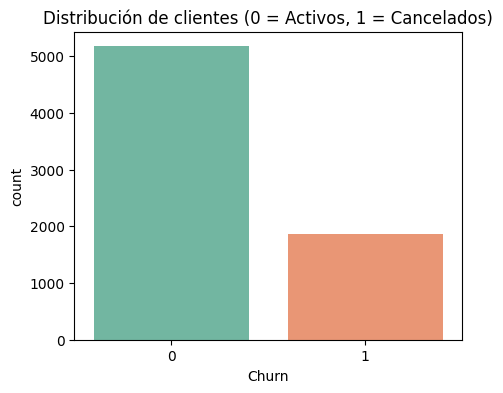

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.735
1    0.265
Name: proportion, dtype: float64


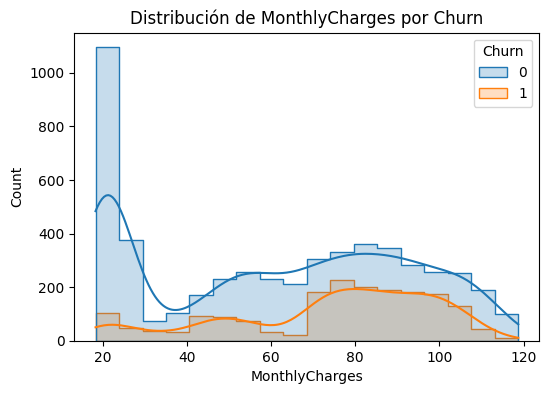

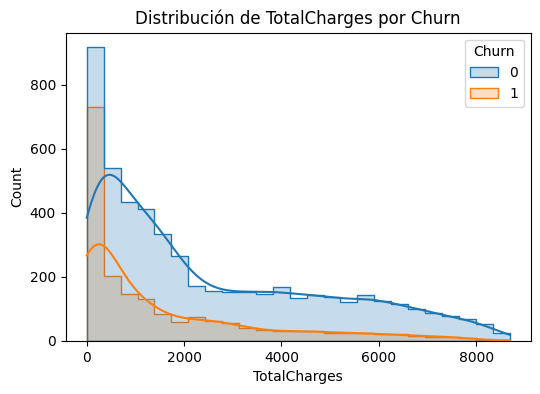

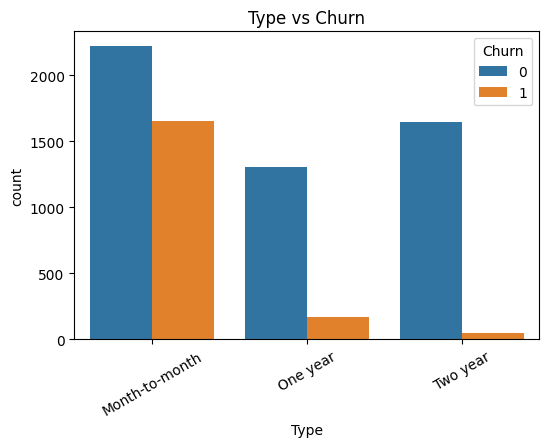

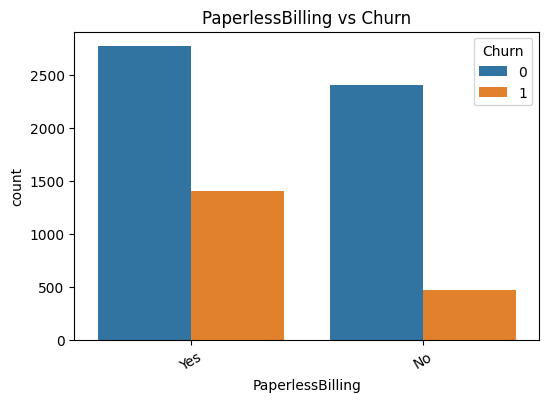

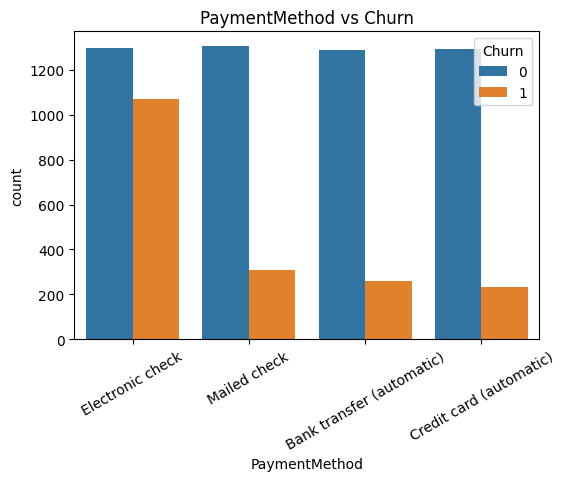

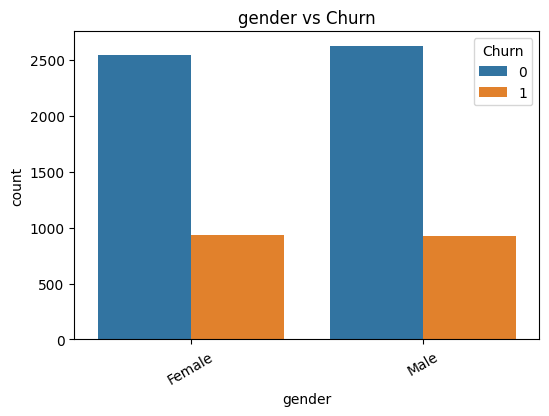

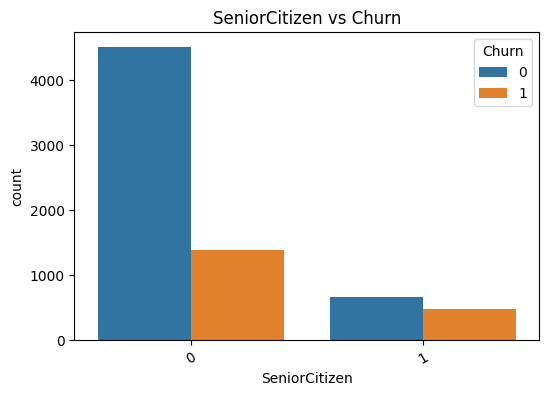

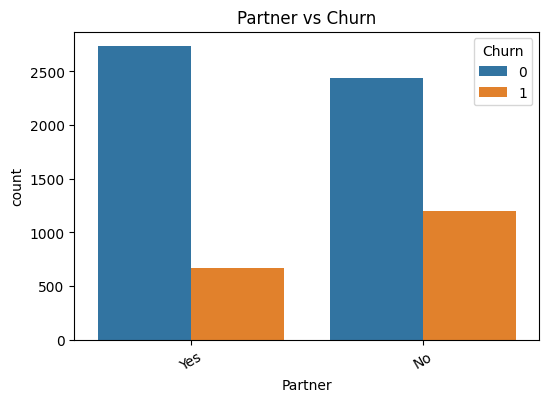

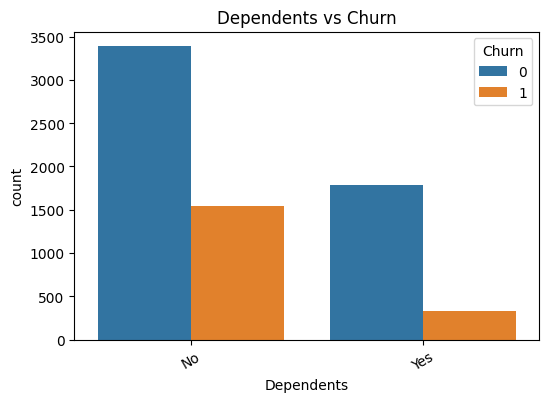

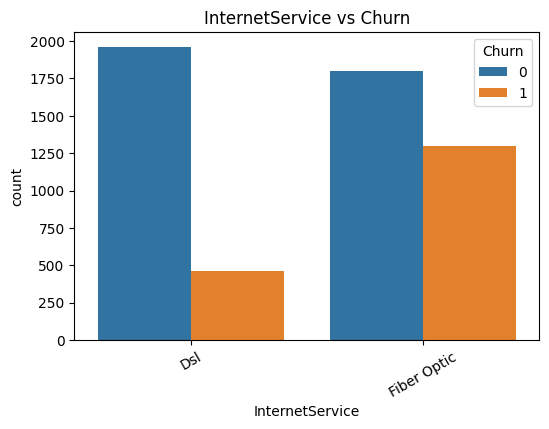

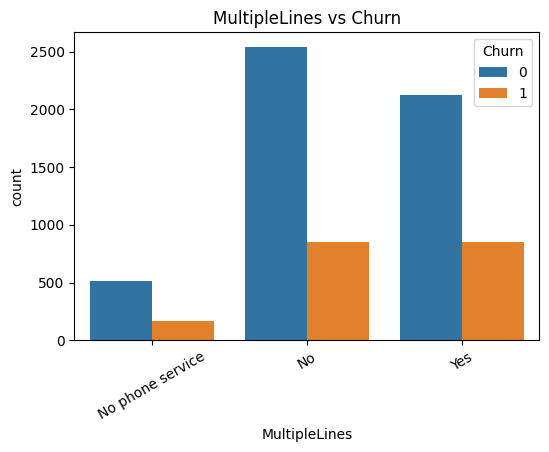

In [ ]:
# 1) Distribución de la variable objetivo (Churn)
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribución de clientes (0 = Activos, 1 = Cancelados)")
plt.show()

print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True).round(3))

# 2) Variables numéricas principales
num_cols = ["MonthlyCharges", "TotalCharges"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, element="step")
    plt.title(f"Distribución de {col} por Churn")
    plt.show()

# 3) Variables categóricas clave
cat_cols = ["Type", "PaperlessBilling", "PaymentMethod",
            "gender", "SeniorCitizen", "Partner", "Dependents",
            "InternetService", "MultipleLines"]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue="Churn")
        plt.title(f"{col} vs Churn")
        plt.xticks(rotation=30)
        plt.show()

De momento podemos apreciar que el Churn está asociado o tiene una relación con contratos de un corto período de tiempo, cargos altos, método de pago electronic check y una falta de servicios adicionales o agregados a su contrato.

De igual manera crearemos un mapa de calor para poder ver de una manera más unificada la correlación de lo mencionado anteriormente.

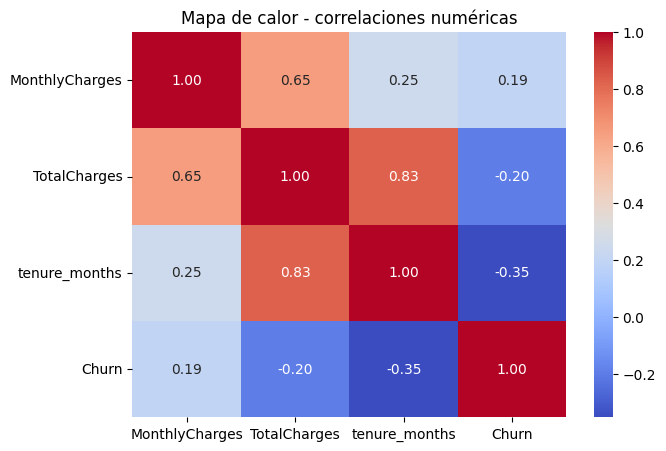

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["MonthlyCharges","TotalCharges","tenure_months","Churn"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - correlaciones numéricas")
plt.show()

# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


  <p>
    ¡Felicidades por tu proyecto! Se nota el esfuerzo y la dedicación que pusiste en el análisis.
    Me parece muy positivo que hayas implementado <strong>funciones de resumen para los DataFrames</strong> y que también
    hayas trabajado con <code>path</code> para manejar tus archivos. Ese tipo de organización muestra un buen nivel de
    estructura en tu código.
  </p>

  <p>
    Dicho esto, quiero darte un par de observaciones para que mejores aún más. En el fragmento de código:
  </p>

  <pre style="background:#f4f4f4; padding:10px; border-radius:5px;">
data_path = "final_provider/"

contract = pd.read_csv(data_path + "contract.csv")
personal = pd.read_csv(data_path + "personal.csv")
internet = pd.read_csv(data_path + "internet.csv")
phone    = pd.read_csv(data_path + "phone.csv")
  </pre>

  <p>
    El <em>indentado</em> que usaste en la última línea no es aconsejable porque rompe la consistencia visual y
    <strong>no sigue las guías de estilo PEP 8</strong>. Lo mejor es mantener la alineación estándar sin agregar
    espacios extras para "acomodar" las asignaciones.
  </p>

  <p>
    En cuanto a las <strong>gráficas</strong>, es recomendable que uses una <em>paleta de colores uniforme</em> a lo largo de todo el proyecto.
    Esto da coherencia visual y facilita que quien lea tus resultados se enfoque en la información, no en los cambios de color.
  </p>

  <p>
    Sobre la parte estadística, te felicito por explorar la correlación con <em>churn</em>. Ten en cuenta que:
    <ul>
      <li><strong>Pearson</strong> mide la relación lineal entre dos variables numéricas continuas. Es útil cuando quieres
      ver si, por ejemplo, más minutos de llamadas están asociados con más o menos churn de manera proporcional.</li>
      <li><strong>Point-Biserial</strong> es un caso especial de Pearson, pero se aplica cuando una de las variables es
      dicotómica (como churn: 0 = se queda, 1 = se va) y la otra es numérica. Sirve para ver si existen diferencias claras
      en los promedios de las variables numéricas entre los dos grupos.</li>
    </ul>
  </p>

  <p>
    Ahora bien, es importante aclarar que si tienes otras variables que también son <strong>dicotómicas</strong>
    (por ejemplo, género codificado como 0/1, o si el cliente tiene o no un servicio adicional representado como sí/no),
    entonces no tiene sentido aplicar <em>Pearson</em> ni <em>Point-Biserial</em> para medir la correlación entre ellas.
    En esos casos, el análisis correcto sería usar <strong>tablas de contingencia</strong> y pruebas estadísticas para variables
    categóricas, como <em>Chi-cuadrado</em>, o bien coeficientes específicos de asociación entre variables binarias como
    <em>Phi</em> o <em>Cramér's V</em>. Esto te permitirá evaluar si existe una relación significativa entre ambas variables
    sin forzar un método diseñado para datos continuos.
  </p>

  </p>
</div>


# Definición del objetivo (target) y separación de features

In [ ]:
TARGET_COL = "EndDate"

y = df[TARGET_COL].apply(lambda x: 0 if pd.isna(x) else 1)
X = df.drop(columns=[TARGET_COL])

# Detección de Data leaks

In [ ]:
suspects = []

def bin_match_score(series, y):
    """Devuelve la mejor coincidencia posible entre y y una versión binarizada de 'series'."""
    s = series.copy()

    # Caso 1: fechas/strings con NaN = 0, no-NaN = 1
    if s.dtype == "O" or str(s.dtype).startswith(("datetime", "Period")):
        s1 = s.notna().astype(int)
        acc1 = (s1.values == y.values).mean()
    else:
        acc1 = -1

    # Caso 2: numéricas binarias (0/1) o dos categorías en texto
    if pd.api.types.is_numeric_dtype(s) and s.nunique(dropna=True) == 2:
        vals = sorted(s.dropna().unique())
        m1 = s.replace({vals[0]:0, vals[1]:1})
        m2 = s.replace({vals[0]:1, vals[1]:0})
        acc2 = max((m1.values == y.values).mean(), (m2.values == y.values).mean())
    elif s.dtype == "O" and s.nunique(dropna=True) == 2:
        vals = list(s.dropna().unique())
        m1 = s.replace({vals[0]:0, vals[1]:1})
        m2 = s.replace({vals[0]:1, vals[1]:0})
        acc2 = max((m1.values == y.values).mean(), (m2.values == y.values).mean())
    else:
        acc2 = -1

    return max(acc1, acc2)

X_tmp = X.copy()
scores = []
for col in X_tmp.columns:
    try:
        score = bin_match_score(X_tmp[col], y)
        scores.append((col, score))
    except Exception:
        continue

suspects = [(c, s) for c, s in sorted(scores, key=lambda t: t[1], reverse=True) if s >= 0.95]
print("Posibles columnas con fuga (score >= 0.95):")
print(suspects)

/tmp/ipython-input-50657837.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m1 = s.replace({vals[0]:0, vals[1]:1})
/tmp/ipython-input-50657837.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m2 = s.replace({vals[0]:1, vals[1]:0})
/tmp/ipython-input-50657837.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

Posibles columnas con fuga (score >= 0.95):
[('Churn', np.float64(1.0))]


/tmp/ipython-input-50657837.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m1 = s.replace({vals[0]:0, vals[1]:1})
/tmp/ipython-input-50657837.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m2 = s.replace({vals[0]:1, vals[1]:0})


# Eliminación de data leaks y verificación

In [ ]:
leak_cols = ["Churn", "customerID"]
X = X.drop(columns=[c for c in leak_cols if c in X.columns], errors="ignore")

suspects = []
scores = []
for col in X.columns:
    try:
        score = bin_match_score(X[col], y)
        scores.append((col, score))
    except Exception:
        continue

suspects = [(c, s) for c, s in sorted(scores, key=lambda t: t[1], reverse=True) if s >= 0.95]
print("Posibles columnas con fuga (score >= 0.95) después de limpiar:")
print(suspects)

/tmp/ipython-input-50657837.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m1 = s.replace({vals[0]:0, vals[1]:1})
/tmp/ipython-input-50657837.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m2 = s.replace({vals[0]:1, vals[1]:0})
/tmp/ipython-input-50657837.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

Posibles columnas con fuga (score >= 0.95) después de limpiar:
[]


# Preprocesamiento

In [ ]:
cat_cols = [c for c in X.columns if X[c].dtype == "object"]
num_cols = [c for c in X.columns if np.issubdtype(X[c].dtype, np.number)]

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols),
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# Modelo Base: Regresión lineal

In [ ]:
clf = LogisticRegression(max_iter=200, solver="liblinear", class_weight="balanced")

pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", clf),
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'tenure_months',
                                                   'SeniorCitizen']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod', 'gender',
                                                   'Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'MultipleLines'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    solver='liblinear'))])

# Evaluación del modelo

AUC-ROC: 0.8419
Accuracy: 0.7388
Matriz de confusión:
 [[748 287]
 [ 81 293]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



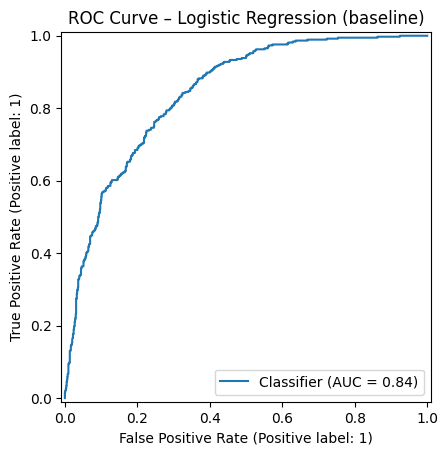

In [ ]:
proba_test = pipe.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

print(f"AUC-ROC: {roc_auc_score(y_test, proba_test):.4f}")
print(f"Accuracy: {accuracy_score(y_test, pred_test):.4f}")
print("Matriz de confusión:\n", confusion_matrix(y_test, pred_test))
print("\nReporte de clasificación:\n", classification_report(y_test, pred_test))

RocCurveDisplay.from_predictions(y_test, proba_test)
plt.title("ROC Curve – Logistic Regression (baseline)")
plt.show()

# Conclusión

El objetivo del proyecto era ayudar a **Interconnect** a pronosticar la cancelación de clientes. El target se definió a partir de la columna `EndDate`, considerando churn cuando existía una fecha de finalización.

Durante el proceso cuidamos de no usar variables que copiaran el target (como la columna `Churn`) y eliminamos identificadores como `customerID` ya que aportaban ruido porque no proveían información relevante al comportamiento de los clientes.

Como modelo inicial usamos **Regresión Logística**. La elección se basó en que es un modelo rápido. El resultado fue un **AUC-ROC de ~0.84**, lo que cumple y muestra que el modelo logra distinguir con buen nivel a clientes que se van de los que permanecen.

No probamos otros modelos más complejos ya que este cumplía exactamente con lo que se quería